## RECIPE AND FOOD RECOMMENDATION USING MACHINE LEARNING
### Data Analysis and Machine Learning Algorithm of FOOD.COM: Clustering and K-Nearest Neighbor

## By: Janine Par 


In [1]:
# Export Libraries required for this project 
import numpy as np  
import pandas as pd  
import numpy as np  

#import json
import datetime
import re
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import seaborn as sns

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('max_colwidth', 800)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import cohen_kappa_score,confusion_matrix,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score
#from catboost import CatBoostClassifier

# Food.com Data Preparation and Exploration Data Analysis

### Load the data from Kaggle and Analyze the structure of the dataset

In [2]:
recipes_dv=pd.read_csv('recipes.csv',  encoding='latin-1')  
review_dv = pd.read_csv('reviews.csv')

# Let's looks at the recipes dataset 


* 522517 records 
* 28 columns



In [3]:
recipes_dv.shape

(522517, 28)

In [4]:
print("Max Recipe Date " + recipes_dv['DatePublished'].max())
print("Min Recipe Date " + recipes_dv['DatePublished'].min())

Max Recipe Date 2020-12-22T22:12:00Z
Min Recipe Date 1999-08-06T00:40:00Z


In [5]:
recipes_dv['Keywords']. head(5)

0    c("Dessert", "Low Protein", "Low Cholesterol",...
1    c("Chicken Thigh & Leg", "Chicken", "Poultry",...
2    c("Low Protein", "Low Cholesterol", "Healthy",...
3    c("Beans", "Vegetable", "Low Cholesterol", "We...
4    c("Low Protein", "Vegan", "Low Cholesterol", "...
Name: Keywords, dtype: object

In [6]:
recipes_dv.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


### Determine the column  and datatypes;

In [8]:
#recipes_dv.columns.tolist() 
recipes_dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [9]:
recipes_dv.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


### Identify the categorical variables 

In [10]:
recipes_dv_cat = recipes_dv.select_dtypes(exclude=np.number)
recipes_dv_cat.head ()
recipes_dv_cat.columns.tolist()

['Name',
 'AuthorName',
 'CookTime',
 'PrepTime',
 'TotalTime',
 'DatePublished',
 'Description',
 'Images',
 'RecipeCategory',
 'Keywords',
 'RecipeIngredientQuantities',
 'RecipeIngredientParts',
 'RecipeYield',
 'RecipeInstructions']

### Identify the numeric variables

In [11]:
recipes_dv_num = recipes_dv.select_dtypes(include=np.number)
recipes_dv_num.head ()
recipes_dv_num.columns.tolist()

['RecipeId',
 'AuthorId',
 'AggregatedRating',
 'ReviewCount',
 'Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent',
 'RecipeServings']

### Handle Recipe missing data

In [12]:
recipes_dv.isna().sum().sort_values(ascending = False)

RecipeYield                   348071
AggregatedRating              253223
ReviewCount                   247489
RecipeServings                182911
CookTime                       82545
Keywords                       17237
RecipeCategory                   751
Description                        5
RecipeIngredientQuantities         3
Images                             1
SaturatedFatContent                0
FiberContent                       0
SugarContent                       0
CarbohydrateContent                0
SodiumContent                      0
ProteinContent                     0
CholesterolContent                 0
RecipeId                           0
FatContent                         0
Calories                           0
Name                               0
RecipeIngredientParts              0
DatePublished                      0
TotalTime                          0
PrepTime                           0
AuthorName                         0
AuthorId                           0
R

### Identify Columns that 50% of rows are empty/nulls

In [13]:
recipes_dv.loc[:, recipes_dv.isnull().sum() > 0.5*recipes_dv.shape[0]].columns

Index(['RecipeYield'], dtype='object')

In [16]:
#Columns that has more than 50% of records are missing are dropped.
recipes_dv=recipes_dv.loc[:, recipes_dv.isnull().sum() < 0.5*recipes_dv.shape[0]]
recipes_dv.shape    
    

(522517, 27)

Removed column RecipeYield because more than 50% of the total number of records is missing data

### Handling of Missing Columns for numbers which may be used as feature in our machine learning model


dataframe recipe column AggregatedRating has 253223 missing values (s)

dataframe recipe column ReviewCount has 247489 missing values (s)

dataframe recipe column RecipeServings has 182911 missing values (s)

#### Impute missing data using median 

In [17]:
recipes_dv['AggregatedRating'] = recipes_dv['AggregatedRating'].fillna(recipes_dv['AggregatedRating'].median())

In [18]:
recipes_dv['ReviewCount'] = recipes_dv['ReviewCount'].fillna(recipes_dv['ReviewCount'].median())

In [19]:
recipes_dv['RecipeServings'] = recipes_dv['RecipeServings'].fillna(recipes_dv['RecipeServings'].median())

### Check for Duplicates

In [20]:
recipes_dv.duplicated().sum()

0

No Duplicate Records has been identified

### Check Top Recipes based on reviews

In [21]:
recipes_dv.sort_values('ReviewCount',ascending = False).head(10)

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
41924,45809,Bourbon Chicken,58278,LinMarie,PT20M,PT15M,PT35M,2002-11-12T20:13:00Z,I searched and finally found this recipe on th...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,24.5,6.5,145.3,1573.0,23.4,0.3,21.5,50.1,4.0,"c(""Editor's Note: Named Bourbon Chicken becau..."
1436,2886,Best Banana Bread,1762,lkadlec,PT1H,PT10M,PT1H10M,1999-09-26T20:49:00Z,Make and share this Best Banana Bread recipe f...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,10.5,6.2,61.6,338.3,42.5,1.4,24.4,3.7,10.0,"c(""Remove odd pots and pans from oven."", ""Preh..."
23725,27208,To Die for Crock Pot Roast,28201,yooper,PT9H,PT5M,PT9H5M,2002-05-03T15:11:00Z,"Amazing flavor, and so simple! No salt needed ...","c(""https://img.sndimg.com/food/image/upload/w_...",...,9.7,3.9,149.8,380.6,2.6,0.1,0.0,49.5,8.0,"c(""Place beef roast in crock pot."", ""Mix the d..."
84057,89204,Crock-Pot Chicken With Black Beans &amp; Cream...,137839,Jen Santiago,PT4H,PT3M,PT4H3M,2004-04-16T20:00:00Z,I love this Crock-Pot chicken recipe for two r...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,35.0,15.2,155.3,913.4,50.1,11.2,9.9,45.9,4.0,"c(""Take 4-5 frozen, yes, frozen, boneless chic..."
35377,39087,Creamy Cajun Chicken Pasta,30534,Lorac,PT15M,PT10M,PT25M,2002-09-02T19:26:00Z,Make and share this Creamy Cajun Chicken Pasta...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,41.1,24.0,198.6,816.8,47.4,2.5,3.1,39.3,2.0,"c(""Place chicken and Cajun seasoning in a bowl..."
32174,35813,Oatmeal Raisin Cookies,8688,Bev I Am,PT11M,PT15M,PT26M,2002-07-30T19:48:00Z,"You've made oatmeal-raisin cookies before, so ...","c(""https://img.sndimg.com/food/image/upload/w_...",...,6.4,3.5,23.9,117.1,30.3,1.8,15.1,3.5,36.0,"c(""Preheat oven to 350Â°."", ""Whisk dry ingredi..."
62823,67256,Best Ever Banana Cake With Cream Cheese Frosting,82367,Rhonda J,PT1H,PT15M,PT1H15M,2003-07-24T20:01:00Z,This is one of (if not) the BEST banana cake I...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,20.6,12.3,89.5,365.4,75.7,1.0,55.7,5.5,16.0,"c(""Preheat oven to 275Â°F (135C)."", ""Grease an..."
50172,54257,"Yes, Virginia There is a Great Meatloaf",24670,Nita Holleman,PT1H,PT20M,PT1H20M,2003-02-17T20:03:00Z,Absolutely delicious meatloaf and sauce! Those...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,28.1,11.0,165.2,1260.5,23.2,0.4,18.9,35.5,6.0,"c(""Meatloaf: Combine meat loaf ingredients and..."
19387,22782,Jo Mama's World Famous Spaghetti,25455,SharleneW,PT1H,PT20M,PT1H20M,2002-03-17T10:26:00Z,My kids will give up a steak dinner for this s...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,26.3,9.0,51.8,2058.6,50.1,3.8,11.4,29.8,6.0,"c(""In large, heavy stockpot, brown Italian sau..."
28625,32204,&quot;Whatever Floats Your Boat&quot; Brownies!,37305,Karen..,PT25M,PT10M,PT35M,2002-06-25T22:28:00Z,"These are absolutely the chewiest, moistest, f...","c(""https://img.sndimg.com/food/image/upload/w_...",...,20.0,10.2,40.3,189.3,52.0,3.4,40.4,6.1,16.0,"c(""Preheat oven to 350Â°F."", ""Grease an 8 inch..."


### Run correlation Map

In [36]:
recipes_dv_num.head()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
0,38,1533,4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0
1,39,1567,3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0
2,40,1566,4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0
3,41,1586,4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0
4,42,1538,4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0


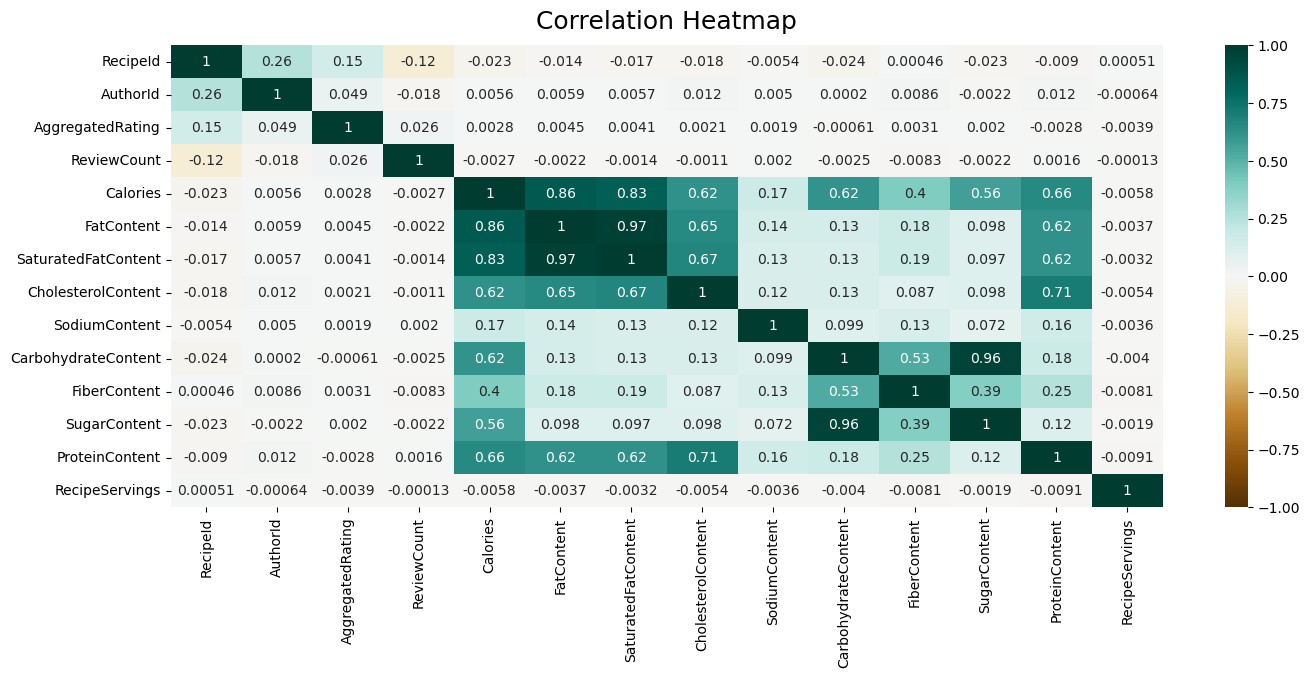

In [35]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(recipes_dv_num.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Let's Look at Review Datasets

In [22]:
review_dv.shape

(1401982, 8)

In [23]:
review_dv.head(n=5)

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


In [24]:
review_dv.isna().sum().sort_values(ascending = False)

Review           214
ReviewId           0
RecipeId           0
AuthorId           0
AuthorName         0
Rating             0
DateSubmitted      0
DateModified       0
dtype: int64

#### Remove Null reviews

In [25]:
review_dv = review_dv.dropna(how='any',axis=0) 

In [26]:
review_dv.columns.tolist() 

['ReviewId',
 'RecipeId',
 'AuthorId',
 'AuthorName',
 'Rating',
 'Review',
 'DateSubmitted',
 'DateModified']

#### Let's merged both datasets for further analysis

In [27]:
Merged_Data = pd.merge(recipes_dv,review_dv, how="outer", left_on = 'RecipeId', right_on= 'RecipeId')

In [28]:
Merged_Data.columns.tolist() 

['RecipeId',
 'Name',
 'AuthorId_x',
 'AuthorName_x',
 'CookTime',
 'PrepTime',
 'TotalTime',
 'DatePublished',
 'Description',
 'Images',
 'RecipeCategory',
 'Keywords',
 'RecipeIngredientQuantities',
 'RecipeIngredientParts',
 'AggregatedRating',
 'ReviewCount',
 'Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent',
 'RecipeServings',
 'RecipeInstructions',
 'ReviewId',
 'AuthorId_y',
 'AuthorName_y',
 'Rating',
 'Review',
 'DateSubmitted',
 'DateModified']

### What are the Top 10 Recipes that has the most reviews and rating

In [36]:
rating = Merged_Data[['Name','Rating','RecipeCategory','RecipeId']].groupby(['RecipeId','Name','RecipeCategory'])['Rating'].agg(['mean','count'])\
                                                        .rename(columns={"mean": "mean_rating", "count": "No_of_Reviews"})
(rating.sort_values(by = ['mean_rating','No_of_Reviews'], ascending= False)).head(n=10)


,,,mean_rating,No_of_Reviews
RecipeId,Name,RecipeCategory,,
55309,Caprese Salad Tomatoes (Italian Marinated Tomatoes),Vegetable,5.0,52
24768,Berry Cream Cheese Coffee Cake,Quick Breads,5.0,37
121941,Kittencal's Soft White Baguette-Style Bread,Yeast Breads,5.0,36
166669,Kittencal's Caesar Tortellini Salad,Summer,5.0,36
62754,Linda's Special Potato Salad,Potato,5.0,32
199171,Broiled Cinnamon Toast,Breakfast,5.0,31
269136,Earth Bread,Breads,5.0,31
18514,Eclair Cake,Dessert,5.0,28
45107,Strawberry Cheese Ring,Spreads,5.0,28


In [ ]:
rating = Merged_Data[['Name','Rating','RecipeCategory','RecipeId']].groupby(['RecipeId','Name','RecipeCategory'])['Rating'].agg(['mean','count'])\
                                                        .rename(columns={"mean": "mean_rating", "count": "No_of_Reviews"})
(rating.sort_values(by = ['mean_rating','No_of_Reviews'], ascending= False)).head(n=10)


In [39]:
## Flatten the index of all Levels
rating.reset_index(inplace=True)

In [40]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()    

### How are the Rating Distributed?

In [31]:
rating=rating.reset_index(inplace=True)

In [35]:
rating.head()

AttributeError: 'NoneType' object has no attribute 'head'

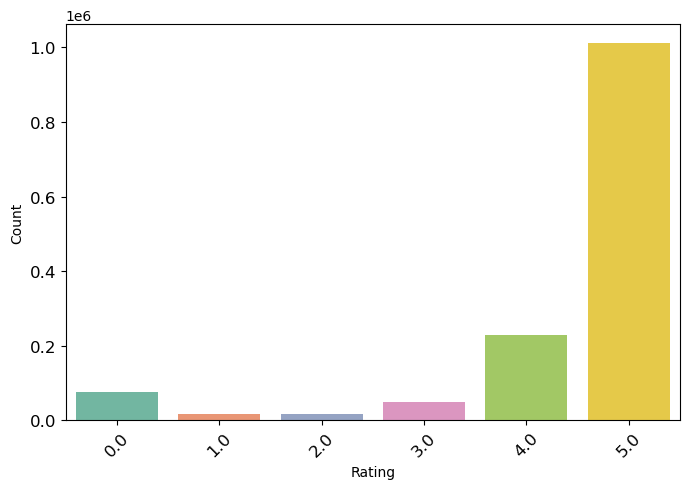

In [44]:
plt.figure(figsize =(7,5))
# count plot on two categorical variable
ax=sns.countplot(x ='Rating', data = Merged_Data, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Rating')
plt.yticks(size=12)
plt.ylabel('Count')

# Add labels for the categories
#plt.xticks([0, 1, 2, 3], ['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

Our Rating distribution is left skwed with 65.2% of our datasets has a recipe rating of 5 

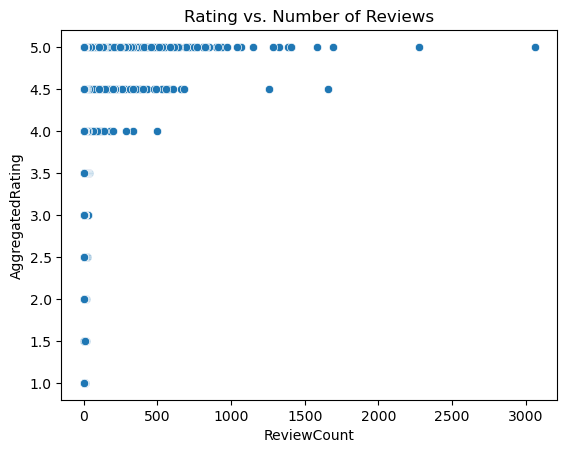

In [45]:
sns.scatterplot(data=recipes_dv, x='ReviewCount', y='AggregatedRating')
plt.title('Rating vs. Number of Reviews')
plt.show()

### Top 20 Recipe Categories based on Review Count

In [68]:
data=recipes_dv.sort_values(by = 'ReviewCount', ascending=False).head(20)

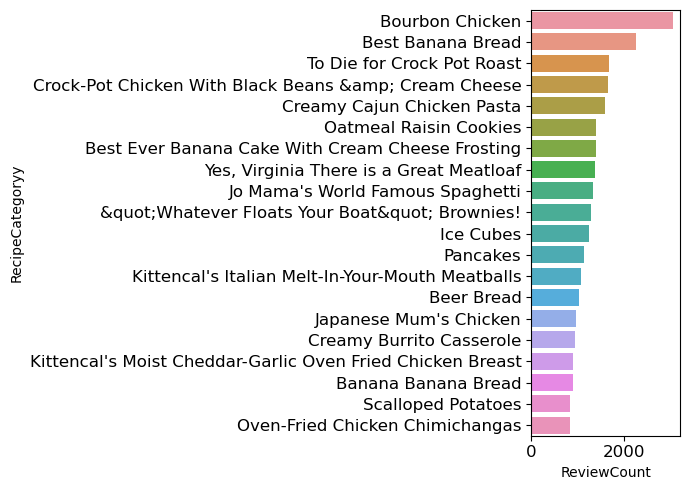

In [69]:
plt.figure(figsize =(7,5))
# count plot on two categorical variable
sns.barplot(data = data, x='ReviewCount', y='Name', orient='h')
plt.xticks(size=12)
plt.xlabel('ReviewCount')
plt.yticks(size=12)
plt.ylabel('RecipeCategoryy')

# Add labels for the categories
#plt.xticks([0, 1, 2, 3], ['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])

# Adjust layout
plt.tight_layout()

#without_hue (ax,Merged_Data.Rating)

### Top Recipe Categories with High Rating

In [50]:
rating.head(0)

,index,RecipeId,Name,RecipeCategory,mean_rating,No_of_Reviews


In [71]:
data=rating.sort_values(by = ['mean_rating','No_of_Reviews' ], ascending=False).head(20)

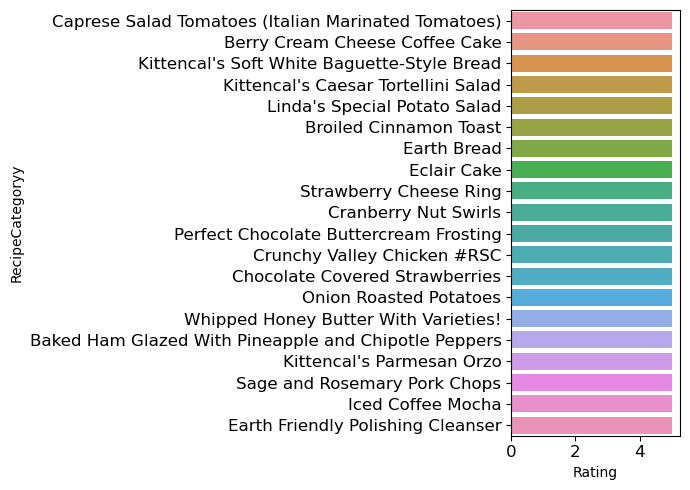

In [72]:
plt.figure(figsize =(7,5))
# count plot on two categorical variable
sns.barplot(data = data, x='mean_rating', y='Name', orient='h')
plt.xticks(size=12)
plt.xlabel('Rating')
plt.yticks(size=12)
plt.ylabel('RecipeCategoryy')

# Add labels for the categories
#plt.xticks([0, 1, 2, 3], ['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])

# Adjust layout
plt.tight_layout()

#without_hue (ax,Merged_Data.Rating)

## Is there any relationship between Rating and Reviews

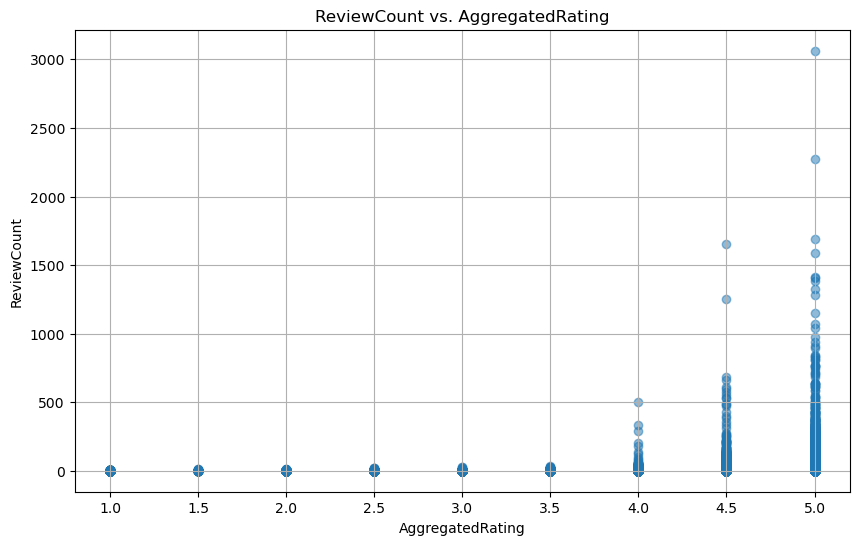

In [75]:
#data['description_length'] = data['about_product'].str.len()

# Plotting the relationship between description length and price
plt.figure(figsize=(10, 6))
plt.scatter(recipes_dv['AggregatedRating'], recipes_dv['ReviewCount'], alpha=0.5)
plt.title('ReviewCount vs. AggregatedRating')
plt.xlabel('AggregatedRating')
plt.ylabel('ReviewCount')
plt.grid(True)
plt.show()


### How do ratings differ between products with high and low review counts?


In [76]:
high_review_threshold = 100  # Example threshold for high review count
low_review_threshold = 10    # Example threshold for low review count

# Categorize products based on review counts
recipes_dv['review_count_category'] = pd.cut(recipes_dv['ReviewCount'], 
                                       bins=[0, low_review_threshold, high_review_threshold, float('inf')],
                                       labels=['Low Review Count', 'Medium Review Count', 'High Review Count'])



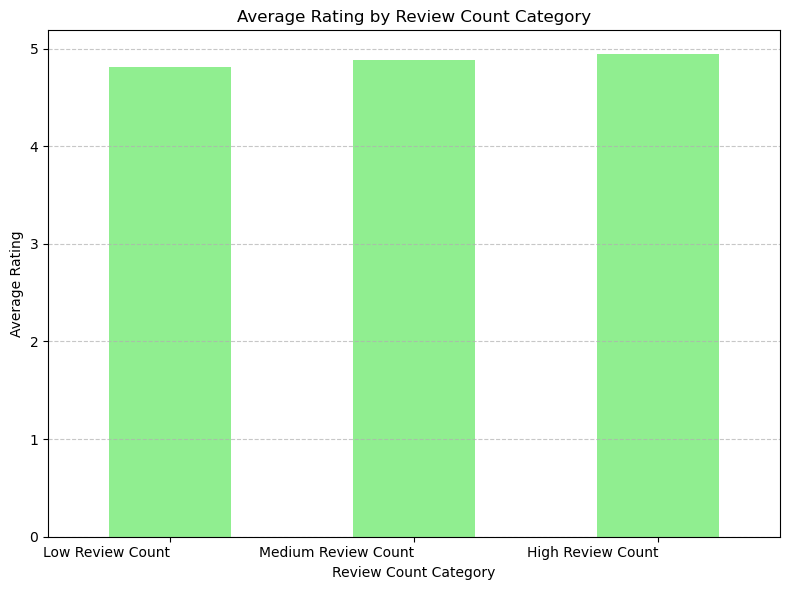

Average Rating by Review Count Category:
review_count_category
Low Review Count       4.806568
Medium Review Count    4.886352
High Review Count      4.940073
Name: AggregatedRating, dtype: float64


In [77]:
# Calculate average rating for each review count category
average_rating_by_review_count = recipes_dv.groupby('review_count_category')['AggregatedRating'].mean()

# Plotting
plt.figure(figsize=(8, 6))
average_rating_by_review_count.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Review Count Category')
plt.xlabel('Review Count Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print average rating by review count category
print("Average Rating by Review Count Category:")
print(average_rating_by_review_count)

This diagram reflect that many recipe that have high rating have variability in the number of review count

In [129]:
data=Merged_Data.sort_values(by = ['AggregatedRating','ReviewCount'], ascending=False).head(20)

In [130]:
data.head()

,RecipeId,Name,AuthorId_x,AuthorName_x,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,RecipeServings,RecipeYield,RecipeInstructions,ReviewId,AuthorId_y,AuthorName_y,Rating,Review,DateSubmitted,DateModified
349714,45809,Bourbon Chicken,58278.0,LinMarie,PT20M,PT15M,PT35M,2002-11-12T20:13:00Z,I searched and finally found this recipe on th...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,4.0,NaN,"c(""Editor's Note: Named Bourbon Chicken becau...",33260.0,58384.0,Suey Tee,4.0,"A good recipe! A tad on the hot side, next tim...",2002-12-02T15:14:24Z,2002-12-02T15:14:24Z
349715,45809,Bourbon Chicken,58278.0,LinMarie,PT20M,PT15M,PT35M,2002-11-12T20:13:00Z,I searched and finally found this recipe on th...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,4.0,NaN,"c(""Editor's Note: Named Bourbon Chicken becau...",34690.0,44642.0,dolores in paradise,0.0,I would like to suggest to anyone\r\nmaking th...,2002-12-16T15:32:20Z,2002-12-16T15:32:20Z
349716,45809,Bourbon Chicken,58278.0,LinMarie,PT20M,PT15M,PT35M,2002-11-12T20:13:00Z,I searched and finally found this recipe on th...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,4.0,NaN,"c(""Editor's Note: Named Bourbon Chicken becau...",36221.0,58278.0,LinMarie,0.0,You have to make the sauce and cook the meat i...,2003-01-01T08:21:44Z,2003-01-01T08:21:44Z
349717,45809,Bourbon Chicken,58278.0,LinMarie,PT20M,PT15M,PT35M,2002-11-12T20:13:00Z,I searched and finally found this recipe on th...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,4.0,NaN,"c(""Editor's Note: Named Bourbon Chicken becau...",38062.0,64463.0,craftykeya,0.0,Loved this recipe. Used orange juice instead ...,2003-01-16T12:47:22Z,2003-01-16T12:47:22Z
349718,45809,Bourbon Chicken,58278.0,LinMarie,PT20M,PT15M,PT35M,2002-11-12T20:13:00Z,I searched and finally found this recipe on th...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,4.0,NaN,"c(""Editor's Note: Named Bourbon Chicken becau...",38516.0,68380.0,cakebaker61,4.0,We really enjoyed this recipe. We changed a fe...,2003-01-20T16:53:44Z,2003-01-20T16:53:44Z


##  Let's look at Micronutrients

For this recommendation system, I would like to focus on the micronutrients features. Perform EDA on Micronutrients

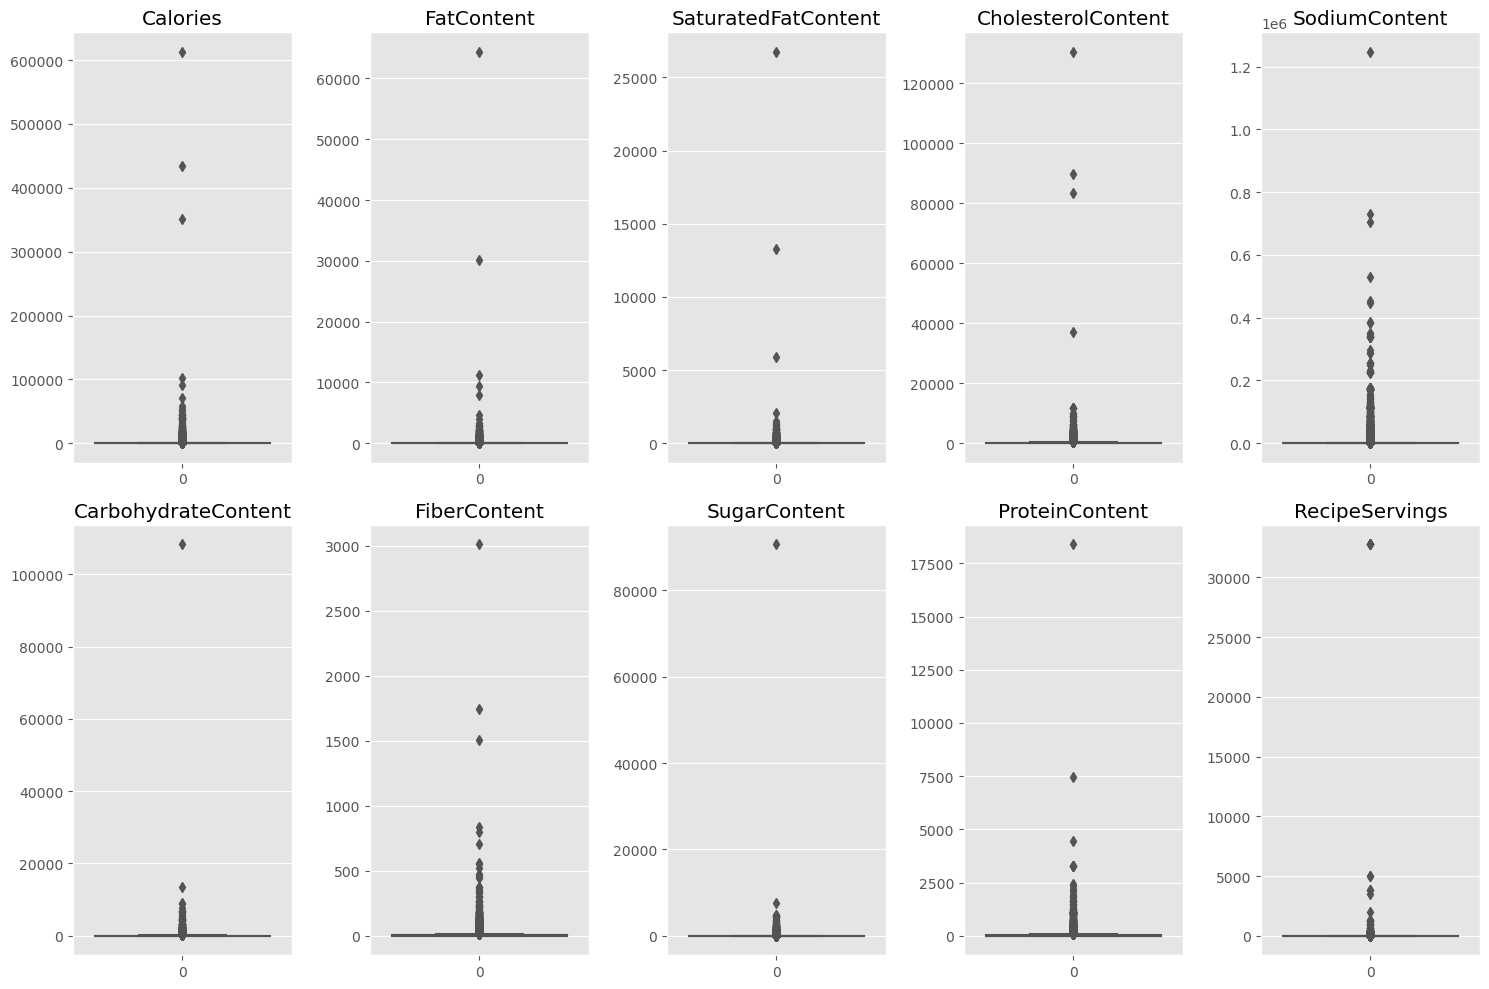

In [78]:
#Identify Micronutrient features
features_cols=[
 'Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent',
 'RecipeServings']

plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(15,10))
axis = axis.ravel()
plt.title('Micronutrients Features')
for i,ax in enumerate(axis):
    sns.boxplot(data=recipes_dv[features_cols[i]],ax=ax)
    ax.set(title=features_cols[i])
plt.tight_layout()
plt.show()

There are many outliers, so we should remove outliers

To remove the outliers i will set my lower and upper bound as : lower bound = Q1 - 1.5 * IQR upper bound = Q3 + 1.5 * IQR.

The values out of these range are considered as outliers and we have to remove them.

In [79]:
Merged_Data2=recipes_dv.copy()

In [80]:
for col in features_cols:
    IQR = Merged_Data2[col].quantile(0.75) - Merged_Data2[col].quantile(0.25)
    colmax = Merged_Data2[col].quantile(0.75) + 1.5 * IQR
    colmin = Merged_Data2[col].quantile(0.25) - 1.5 * IQR
    Merged_Data2 = Merged_Data2[ (Merged_Data2[col] < colmax) & (Merged_Data2[col] > colmin) ]

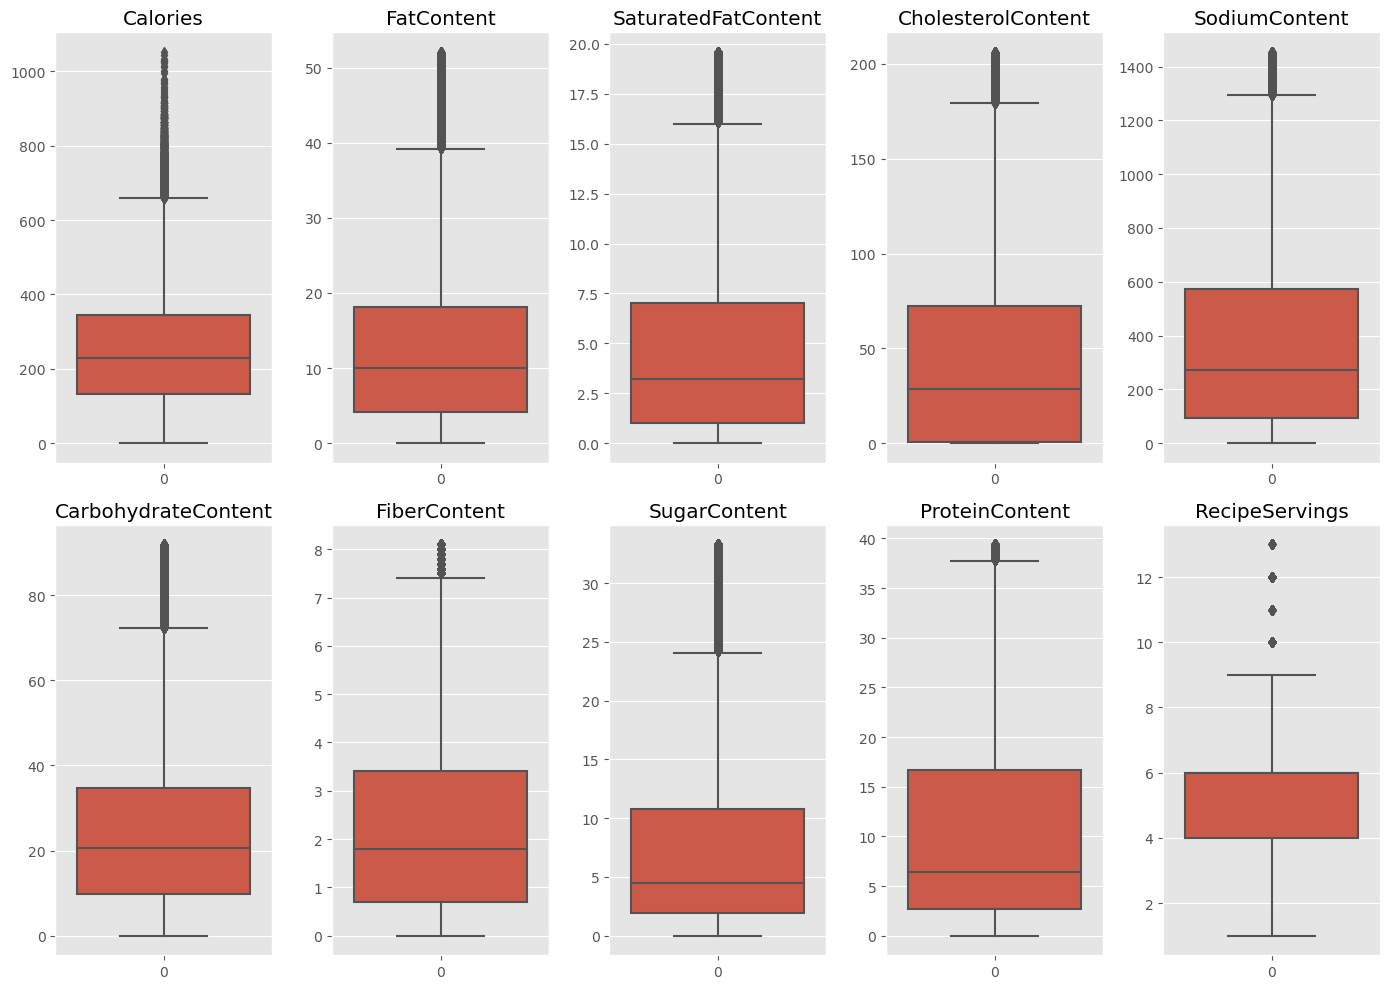

In [81]:
#Now we will look at distributions again
plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(14,10))
axis = axis.ravel()
for i,ax in enumerate(axis):
    sns.boxplot(data=Merged_Data2[features_cols[i]],ax=ax)
    ax.set(title=features_cols[i])
plt.tight_layout()
plt.show()

In [82]:
Merged_Data2.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,review_count_category
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Low Review Count
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil...",Medium Review Count
7,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,PT50M,PT30M,PT1H20M,1999-08-06T00:40:00Z,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",...,1.7,24.5,281.8,37.5,0.5,24.7,4.2,8.0,"c(""Preheat oven to 350Â°F."", ""Make pie crust, ...",Low Review Count
8,46,A Jad - Cucumber Pickle,1533,Dancer,NaN,PT25M,PT25M,1999-08-11T19:48:00Z,Make and share this A Jad - Cucumber Pickle re...,character(0),...,0.0,0.0,0.7,1.1,0.2,0.2,0.1,6.0,"c(""Slice the cucumber in four lengthwise, then...",Low Review Count
9,47,Butter Pecan Cookies,1573,benluc,PT9M,PT55M,PT1H4M,1999-09-07T09:01:00Z,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.4,6.3,15.0,4.5,0.6,1.6,0.8,6.0,"c(""Preheat oven to 350 degrees."", ""Cream butte...",Low Review Count


Correlation Matrix

In [83]:
recipe_df_clean=Merged_Data2.copy()
#recipe_df_clean=Merged_Data2[features_cols]
#recipe_df_clean1=Merged_Data2.copy()

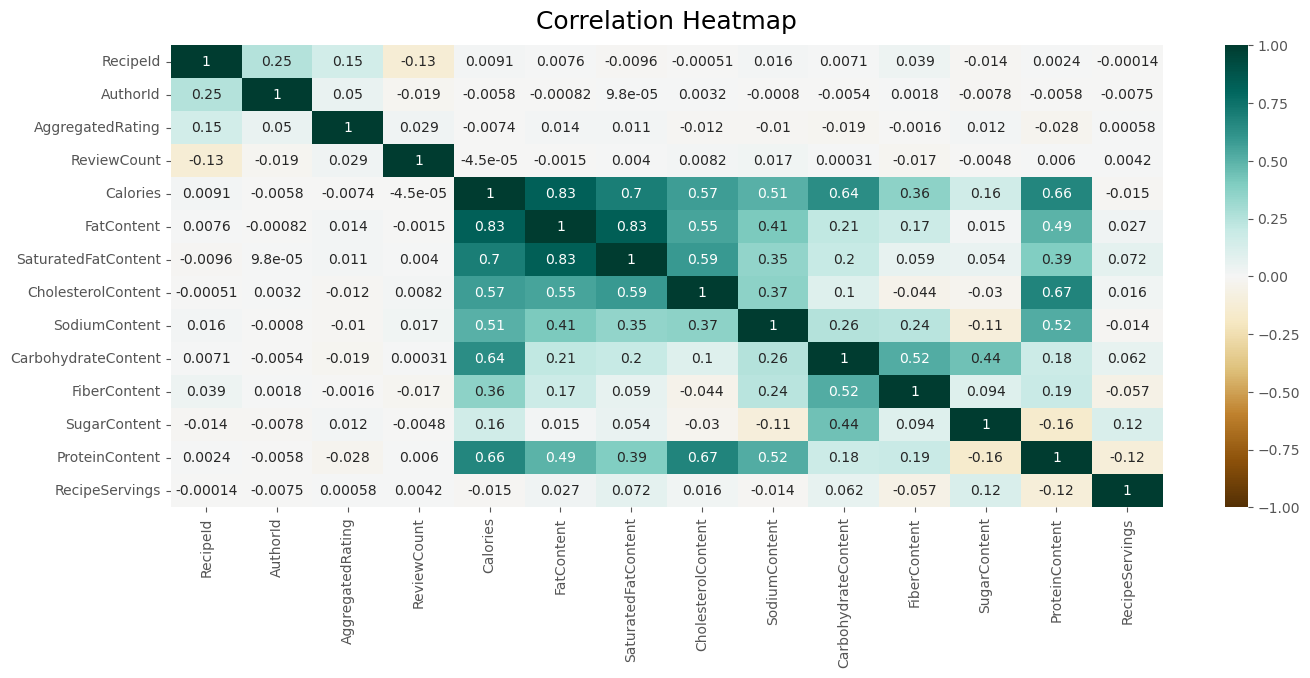

In [84]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(recipe_df_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

### Micronutrients on High Ratings and High Review Items

In [122]:
data_sort=recipe_df_clean.sort_values(by = ['ReviewCount','AggregatedRating' ], ascending=False).head(20)

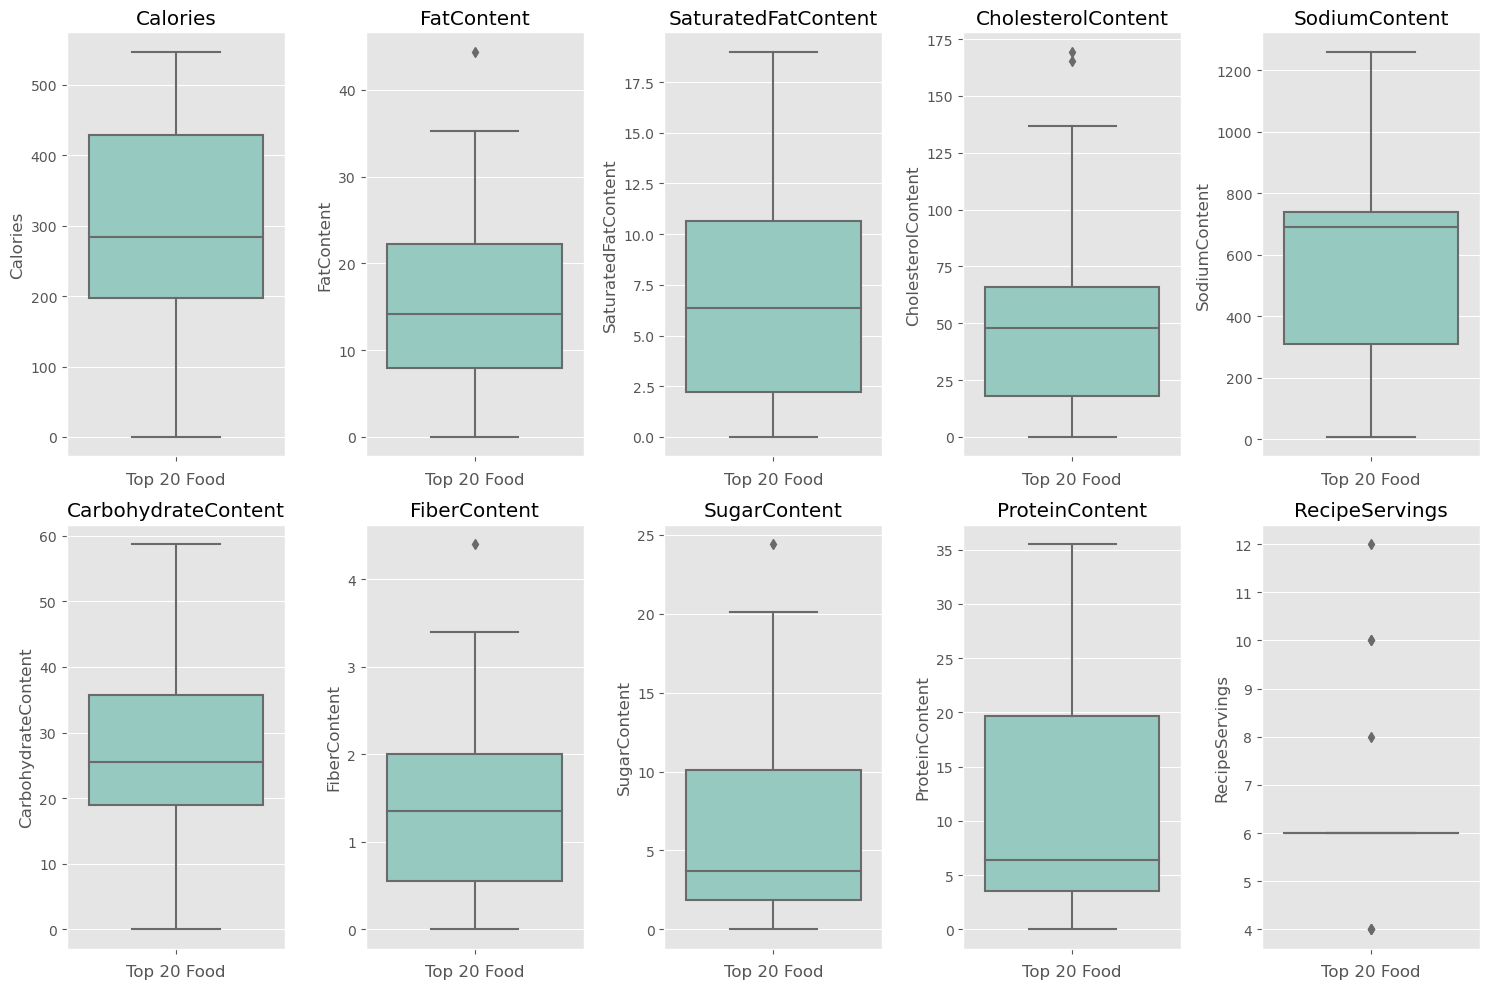

In [131]:
#Identify Micronutrient features
features_cols=[
 'Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent',
 'RecipeServings']

plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(15,10))
axis = axis.ravel()
for i,ax in enumerate(axis):
    #sns.boxplot(y=data=recipes_df_scaled['cluster2'].value_counts()[features_cols[i]],ax=ax, palette="Set3")
    sns.boxplot(y=data_sort[features_cols[i]],ax=ax, palette="Set3")
    ax.set(title=features_cols[i])
    ax.set_xlabel('Top 20 Food')
plt.tight_layout()
plt.show()



## Description Common Words of Top Reviews Recipe

In [140]:
data=Merged_Data.head().sort_values(by = ['ReviewCount','AggregatedRating' ], ascending=False).head(100)

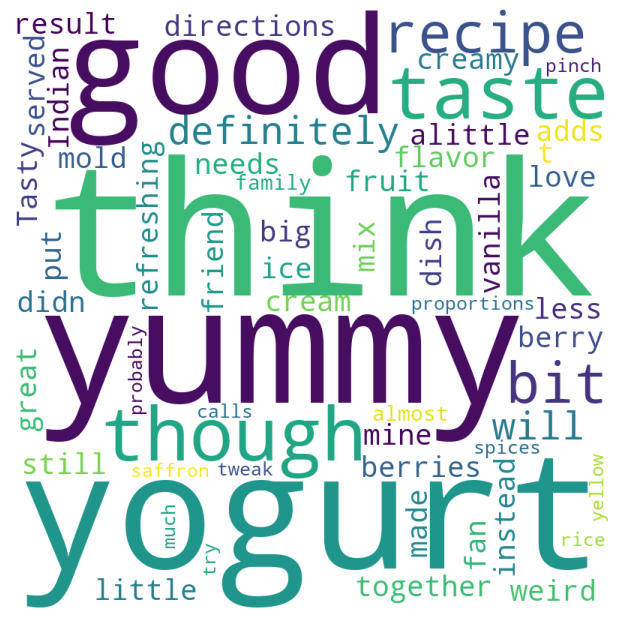

In [141]:
from wordcloud import WordCloud

reviews_text = ' '.join(data['Review'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Data Prep for Machine Learning

### Due to limited compute, I have filtered data 
2,000 calories a day is used as a general guide for nutrition advice, but your calorie needs may be higher or lower depending on your age, sex, height, weight, and physical activity level....



In [160]:
Calories=2000
daily_fat=100
daily_Saturatedfat=13
daily_Cholesterol=300
daily_Sodium=2300
daily_Carbohydrate=325
daily_Fiber=40
daily_Sugar=40
daily_Protein=200
daily_list=[Calories,daily_fat,daily_Saturatedfat,daily_Cholesterol,daily_Sodium,daily_Carbohydrate,daily_Fiber,daily_Sugar,daily_Protein]

In [163]:
column=[
 'Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent']

In [168]:
recipe_df_clean.columns[16:25],daily_list

(Index(['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
        'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
        'ProteinContent'],
       dtype='object'),
 [2000, 100, 13, 300, 2300, 325, 40, 40, 200])

In [157]:
recipe_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289514 entries, 0 to 522515
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   RecipeId                    289514 non-null  int64   
 1   Name                        289514 non-null  object  
 2   AuthorId                    289514 non-null  int64   
 3   AuthorName                  289514 non-null  object  
 4   CookTime                    238392 non-null  object  
 5   PrepTime                    289514 non-null  object  
 6   TotalTime                   289514 non-null  object  
 7   DatePublished               289514 non-null  object  
 8   Description                 289514 non-null  object  
 9   Images                      289514 non-null  object  
 10  RecipeCategory              289163 non-null  object  
 11  Keywords                    279559 non-null  object  
 12  RecipeIngredientQuantities  289511 non-null  object  
 13 

In [170]:
#recipe_df_clean1=recipe_df_clean1.copy()
for column,maximum in zip(recipe_df_clean.columns[16:25],daily_list):
    recipe_df_clean=recipe_df_clean[recipe_df_clean[column]<maximum]

In [174]:
recipe_df_clean.shape

(270102, 28)

### Scaling: recipe_df_clean

In [175]:
from sklearn import preprocessing

In [182]:
column=[
 'Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent']

recipe_df_clean1=recipe_df_clean[column] 

In [183]:
recipe_df_clean1.head()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
4,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3
7,228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2
8,4.3,0.0,0.0,0.0,0.7,1.1,0.2,0.2,0.1
9,69.0,5.6,1.4,6.3,15.0,4.5,0.6,1.6,0.8


In [184]:
scaler = preprocessing.StandardScaler()
scaled_feature = scaler.fit_transform(recipe_df_clean1.values)

In [185]:
recipes_df_scaled = pd.DataFrame(scaled_feature, index=recipe_df_clean1.index, columns=recipe_df_clean1.columns)
recipes_df_scaled.head()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,-0.450217,-0.942080,-0.732958,-0.705604,-0.976704,0.768264,0.679038,2.844595,-0.689905
4,-0.933640,-1.177234,-1.083767,-0.887135,1.792217,0.086965,1.292724,1.270366,-0.581114
7,-0.040062,-0.426981,-0.616022,-0.331198,-0.226012,0.790974,-0.906319,2.151934,-0.591004
8,-1.646921,-1.222025,-1.113001,-0.887135,-1.063391,-1.275634,-1.059741,-0.933553,-0.996499
9,-1.182175,-0.594948,-0.703724,-0.744179,-1.020792,-1.082599,-0.855179,-0.757240,-0.927268


In [186]:
recipes_df_scaled.shape

(270102, 9)

### Run Unsupervised Machine Learning Algorithm Clustering to group similar recipes into clusters


In [188]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

### 1. This loops through values of k (2-15)  and compute the silhouette coefficient:

In [189]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(recipes_df_scaled)
    inertia.append(kmeans.inertia_)

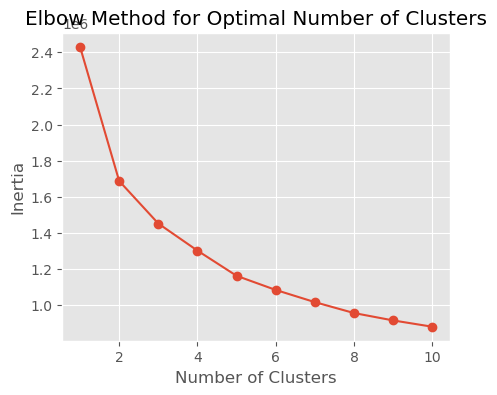

In [190]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

The elbow plot shows a sharp decrease in inertia as the number of clusters increases from 1 to 3, indicating that adding more clusters significantly improves clustering quality up to this point. The “elbow” point, where the rate of decrease in inertia slows down, is observed at k = 3. Therefore, the optimal number of clusters for your dataset is likely 3, as this provides a good balance between cluster compactness and separation, minimizing within-cluster variance effectively.



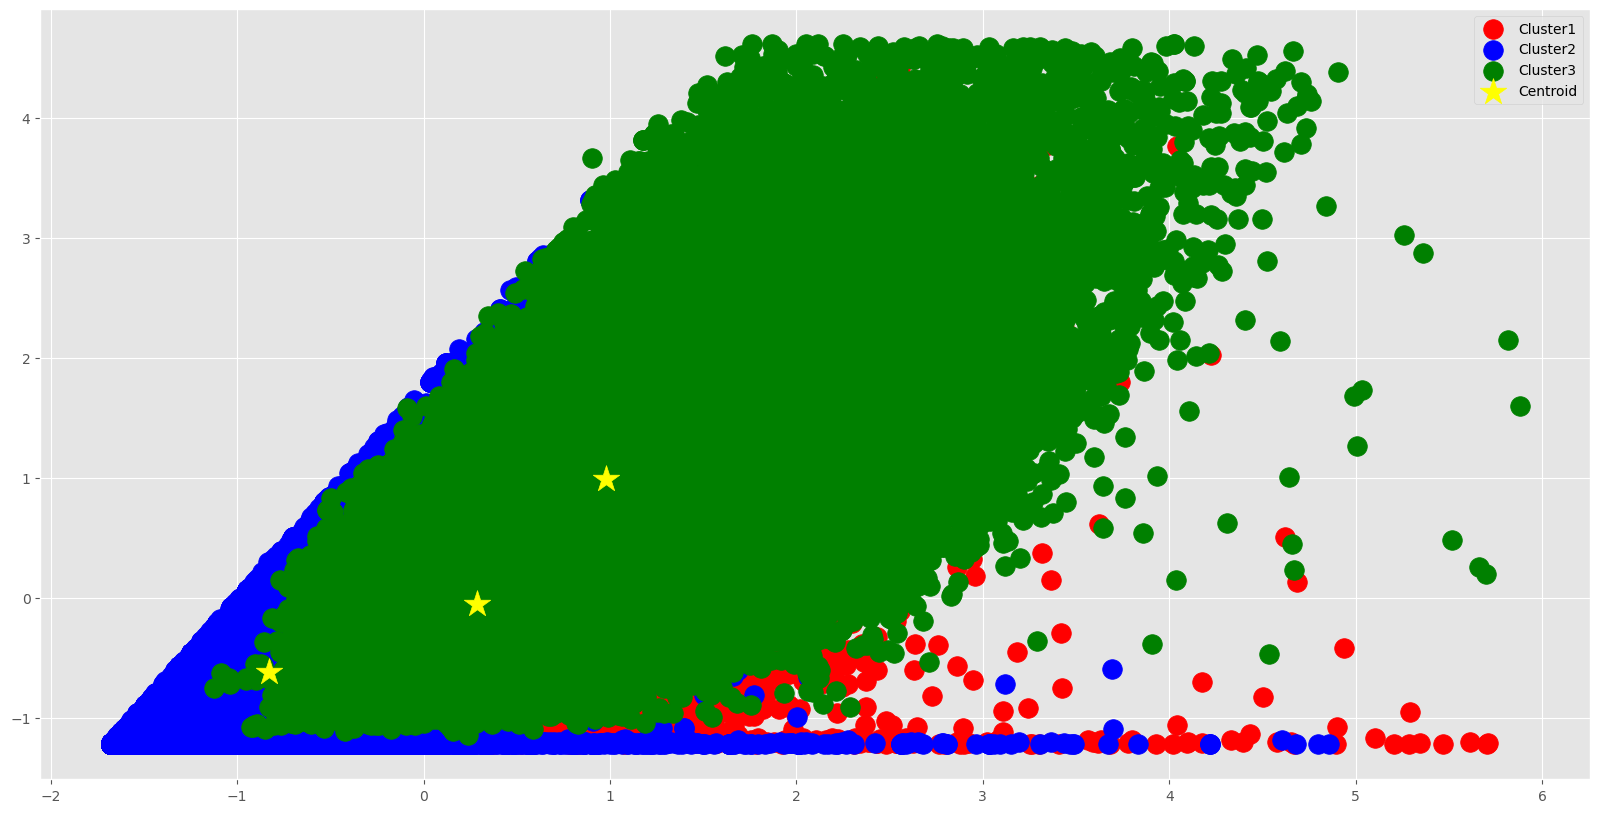

In [191]:
Kmeans = KMeans(n_clusters = 3,                 # Set to optimal cluster =2 
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_feature)

plt.figure(figsize = (20,10))

#Plot the clusters and centroids
plt.scatter(scaled_feature[y_Kmeans == 0, 0], 
            scaled_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_feature[y_Kmeans == 1, 0],
            scaled_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')
plt.scatter(scaled_feature[y_Kmeans == 2, 0],
            scaled_feature[y_Kmeans == 2, 1], 
            s = 200, c = 'green', label = 'Cluster3')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()

### Feature Reduction: Fit a PCA transformation with three features to the scaled data.

Perform PCA with the chosen number of components=3

In this K-means clustering exercise on ALS dataset, Here are my findings:

* Standard scaling is important as we want to treat all the features equally and we can achieve this by transforming the features to a values that fall within the same numerical range. 


* Based on the silhouette v.s number of clusters for <b> Standard Scaled ALS dataset</b> , the best choice for <b> K = 3 </b>  because it shows the highest silhouette score. However, I still observed that there are overlap between clusters. The blue and red segment are not that clearly separated even after reducing a few highly correlated features. 


* After fitting the <b> scaled dataset to PCA (with 3 features) and runnig it to K-means (n_cluster=3) </b> , the Red and Blue segments are clearly separated which means that PCA has reduced the noise and redundancy in the data and shows a more improved quality of the clusters. 


In [192]:
from sklearn.decomposition import PCA
scaled_pca = PCA(n_components=3).fit(recipes_df_scaled.values)
scaled_pca_feature = scaled_pca.transform(recipes_df_scaled.values)

In [193]:
scaled_pca.explained_variance_ratio_

array([0.44379809, 0.19098745, 0.12029115])

In [194]:
# To identify the importance of each feature on each component, use the components_ attribute.
scaled_pca.components_
print(pd.DataFrame(scaled_pca.components_,columns=recipes_df_scaled.columns,index = ['PC-1','PC-2', 'PC-3']))

      Calories  FatContent  SaturatedFatContent  CholesterolContent  \
PC-1  0.470998    0.413806             0.381913            0.344578   
PC-2  0.140585   -0.115739            -0.155658           -0.319125   
PC-3  0.042257    0.218947             0.374752            0.134454   

      SodiumContent  CarbohydrateContent  FiberContent  SugarContent  \
PC-1       0.313917             0.255479      0.184851      0.049000   
PC-2      -0.063369             0.573589      0.452092      0.503857   
PC-3      -0.412213            -0.033408     -0.495062      0.555308   

      ProteinContent  
PC-1        0.376762  
PC-2       -0.222466  
PC-3       -0.259363  


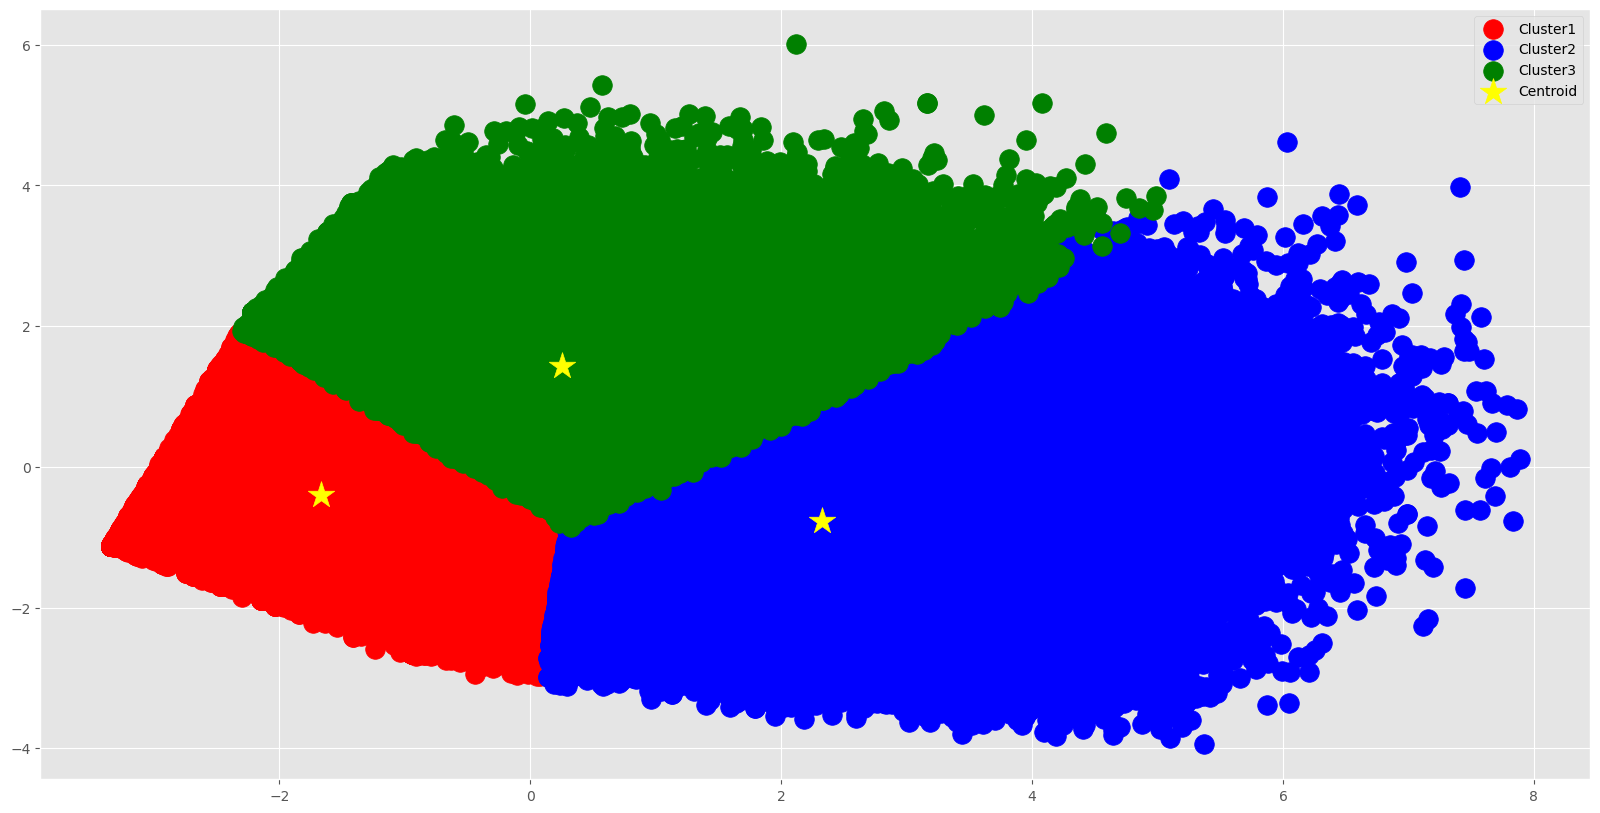

In [196]:
Kmeans = KMeans(n_clusters = 3,                 # Set to optimal cluster =2 
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_pca_feature)

plt.figure(figsize = (20,10))

#Plot the clusters and centroids
plt.scatter(scaled_pca_feature[y_Kmeans == 0, 0], 
            scaled_pca_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_pca_feature[y_Kmeans == 1, 0],
            scaled_pca_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')
plt.scatter(scaled_pca_feature[y_Kmeans == 2, 0],
            scaled_pca_feature[y_Kmeans == 2, 1], 
            s = 200, c = 'green', label = 'Cluster3')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()

Observation: By setting c=clusters, points belonging to the same cluster will have the same color, making it easier to visualize and distinguish the clusters.

In [197]:
recipe_df_clean['cluster'] =Kmeans.labels_

In [198]:
recipe_df_clean.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,review_count_category,cluster
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",Low Review Count,2
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil...",Medium Review Count,2
7,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,PT50M,PT30M,PT1H20M,1999-08-06T00:40:00Z,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",...,24.5,281.8,37.5,0.5,24.7,4.2,8.0,"c(""Preheat oven to 350Â°F."", ""Make pie crust, ...",Low Review Count,2
8,46,A Jad - Cucumber Pickle,1533,Dancer,NaN,PT25M,PT25M,1999-08-11T19:48:00Z,Make and share this A Jad - Cucumber Pickle re...,character(0),...,0.0,0.7,1.1,0.2,0.2,0.1,6.0,"c(""Slice the cucumber in four lengthwise, then...",Low Review Count,0
9,47,Butter Pecan Cookies,1573,benluc,PT9M,PT55M,PT1H4M,1999-09-07T09:01:00Z,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,6.3,15.0,4.5,0.6,1.6,0.8,6.0,"c(""Preheat oven to 350 degrees."", ""Cream butte...",Low Review Count,0


In [212]:
recipe_df_clean['cluster'].value_counts()

0    119031
1     77205
2     73866
Name: cluster, dtype: int64

### Determine the Micronutrients distribution under each clusters

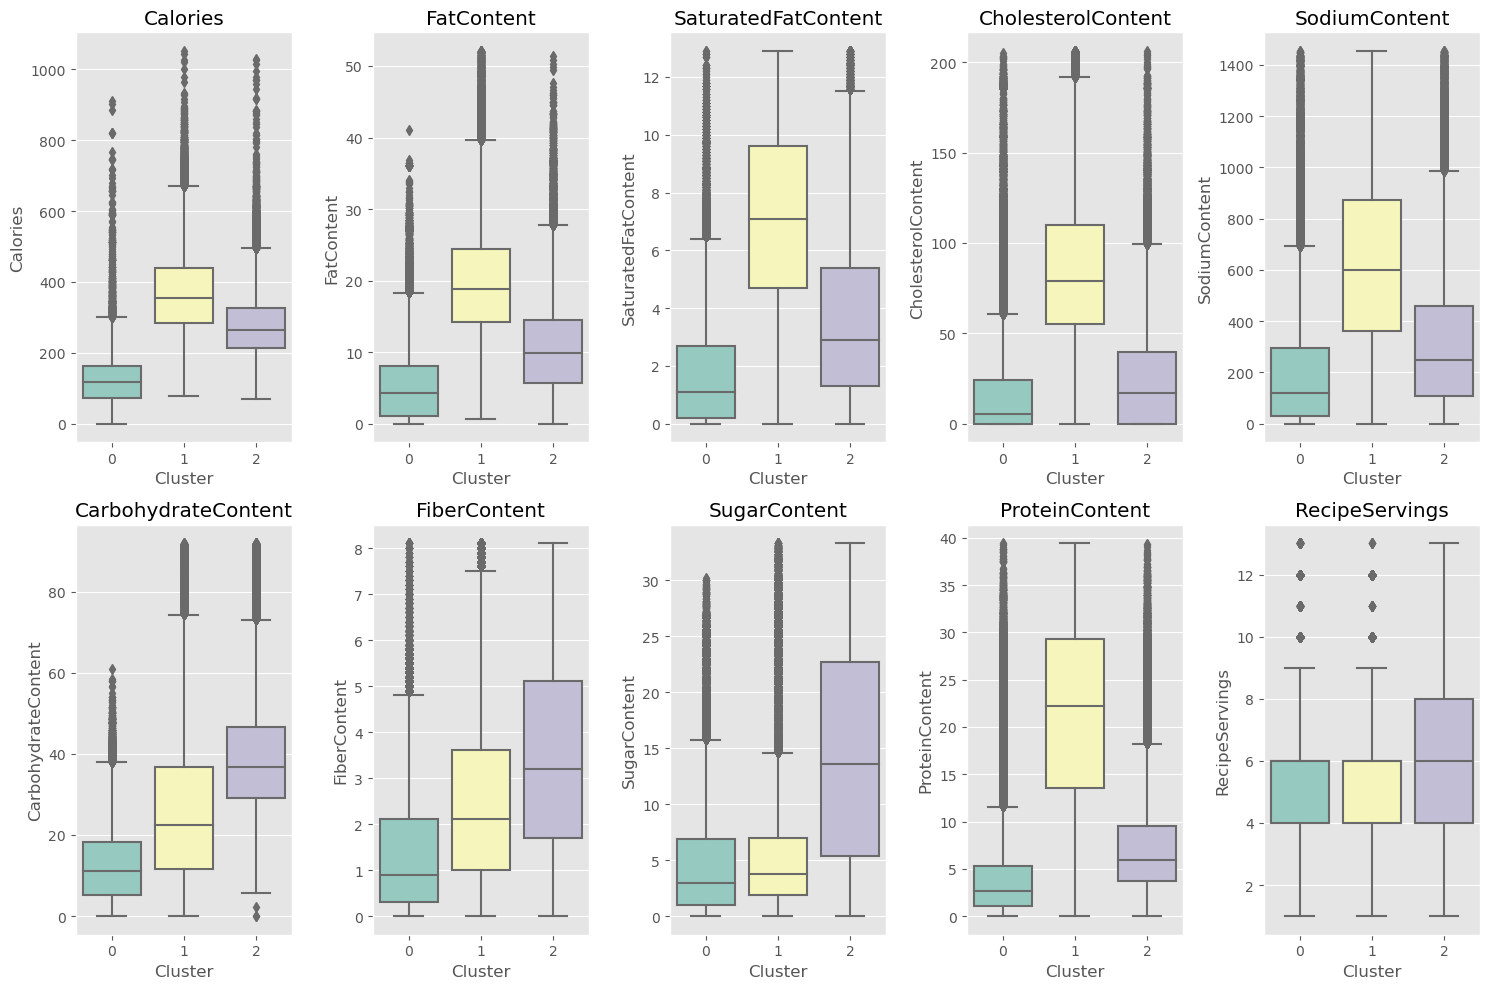

In [201]:
#Identify Micronutrient features
features_cols=[
 'Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent',
 'RecipeServings']

plt.style.use('ggplot')
fig, axis = plt.subplots(2,5,figsize=(15,10))
axis = axis.ravel()
for i,ax in enumerate(axis):
    #sns.boxplot(y=data=recipes_df_scaled['cluster2'].value_counts()[features_cols[i]],ax=ax, palette="Set3")
    sns.boxplot(y=recipe_df_clean[features_cols[i]], x=recipe_df_clean['cluster'],ax=ax, palette="Set3")
    ax.set(title=features_cols[i])
    ax.set_xlabel('Cluster')
plt.tight_layout()
plt.show()



The Silhouette Score is a metric used to evaluate the quality of a clustering algorithm, such as K-Means. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where: +1 indicates that the sample is far away from the neighboring clusters and very close to the cluster it is assigned to. 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. -1 indicates that the sample might have been assigned to the wrong cluster, as it is closer to a neighboring cluster than to the cluster it is assigned to.



### Apply Classification Machine learning algorithm to determine the cluster. This 

Run Classifier algorithms to predict which cluster a new recipe belongs to and recommend similar recipes from that cluster.

In [203]:
recipes_df_scaled['cluster'] =Kmeans.labels_

In [204]:
X=recipes_df_scaled.drop('cluster',axis=1)
y=recipes_df_scaled['cluster']  # Use cluster as the Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [205]:
result1, result2, result3 = [], [], [] 

In [206]:
train_f1_scores = []
test_f1_scores = []
model_names = []


def call_model(model, model_name):
    # fit using scaled data
    global train_f1_scores, test_f1_scores, model_names
    model.fit(X_train, y_train) 
    
    # Prediction
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)  
    
    # Calculate metrics with specified average
    train_accuracy = accuracy_score(y_train, train_pred) * 100
    train_recall = recall_score(y_train, train_pred, average='weighted') * 100
    train_f1_score = f1_score(y_train, train_pred, average='weighted') * 100
    
    test_accuracy = accuracy_score(y_test, test_pred) * 100
    test_recall = recall_score(y_test, test_pred, average='weighted') * 100
    test_f1_score = f1_score(y_test, test_pred, average='weighted') * 100


    train_f1_scores.append(train_f1_score)
    test_f1_scores.append(test_f1_score)
    model_names.append(model_name)

    
    # Append results
    result1.append(test_accuracy)
    result2.append(test_recall)
    result3.append(test_f1_score)
    
    print("Classification Report for Test Data:")
    print(classification_report(y_test, test_pred))
    
    print("\nClassification Report for Train Data:")
    print(classification_report(y_train, train_pred))  
    
    # Accuracy, Recall, and F1 Scores
    print(f'Training Accuracy: {train_accuracy}, Train Recall: {train_recall}, Train F1: {train_f1_score}')
    print(f'Test Accuracy: {test_accuracy}, Test Recall: {test_recall}, Test F1: {test_f1_score}')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(cm, annot=True, fmt='0.2f', cmap='YlGnBu', linewidths=1)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    
    labels = ['Train F1 Score', 'Test F1 Score']
    scores = [train_f1_score, test_f1_score]

    plt.figure(figsize=(4, 7))  # Larger figure for better design
    bars = plt.bar(labels, scores, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

    plt.ylim(0, 100)  # Since F1 scores are percentages, 0 to 100 is the range
    plt.title(f'F1 Score Comparison: {model_name}', fontsize=14)
    plt.ylabel('F1 Score (%)')
    
    # Display values in the center of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height/2, f'{height:.2f}%', 
                 ha='center', va='center', color='white', fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()
    plt.show()

### Run Logical Regression Model

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39158
           1       1.00      1.00      1.00     25414
           2       1.00      1.00      1.00     24562

    accuracy                           1.00     89134
   macro avg       1.00      1.00      1.00     89134
weighted avg       1.00      1.00      1.00     89134


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79873
           1       1.00      1.00      1.00     51791
           2       1.00      1.00      1.00     49304

    accuracy                           1.00    180968
   macro avg       1.00      1.00      1.00    180968
weighted avg       1.00      1.00      1.00    180968

Training Accuracy: 99.95524070553911, Train Recall: 99.95524070553911, Train F1: 99.95523866024189
Test Accuracy: 99.96409899701572, Test Recall: 99.9640989970157

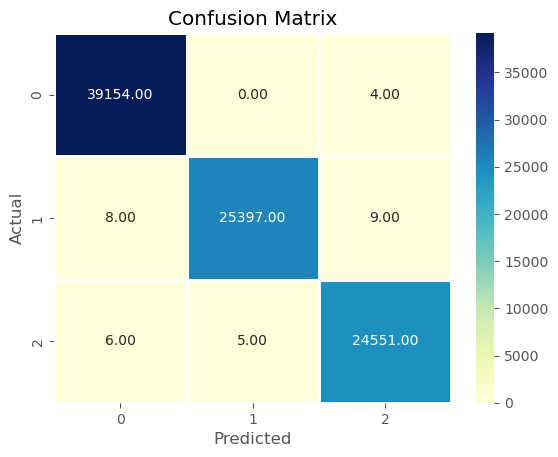

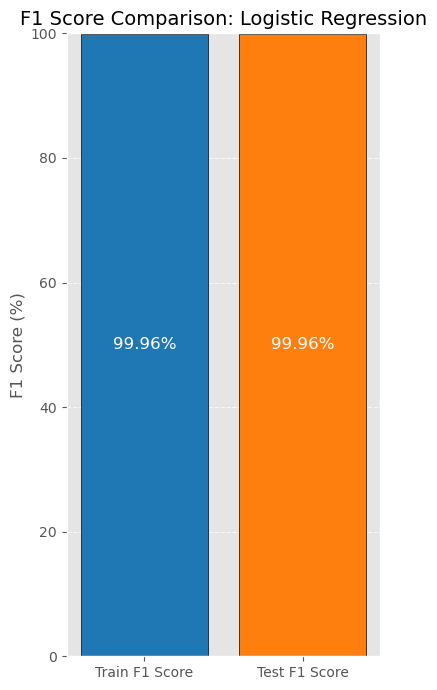

In [207]:
from sklearn.linear_model import LogisticRegression  

logistic_regression = LogisticRegression()
call_model(logistic_regression, 'Logistic Regression')


### Run Decision Tree Classifier

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     39158
           1       0.94      0.94      0.94     25414
           2       0.92      0.92      0.92     24562

    accuracy                           0.95     89134
   macro avg       0.94      0.94      0.94     89134
weighted avg       0.95      0.95      0.95     89134


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79873
           1       1.00      1.00      1.00     51791
           2       1.00      1.00      1.00     49304

    accuracy                           1.00    180968
   macro avg       1.00      1.00      1.00    180968
weighted avg       1.00      1.00      1.00    180968

Training Accuracy: 100.0, Train Recall: 100.0, Train F1: 100.0
Test Accuracy: 94.88186326205489, Test Recall: 94.88186326205489, Test F1: 94.88196508536541


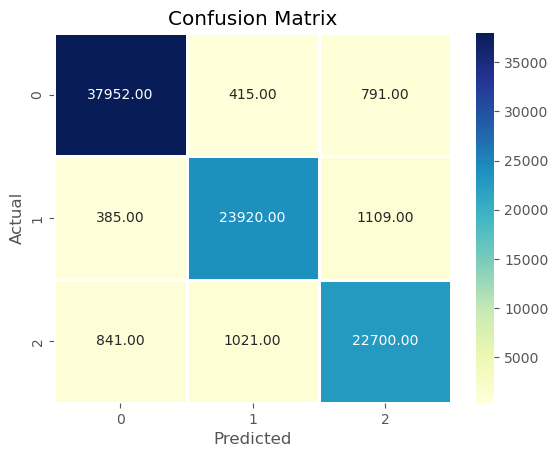

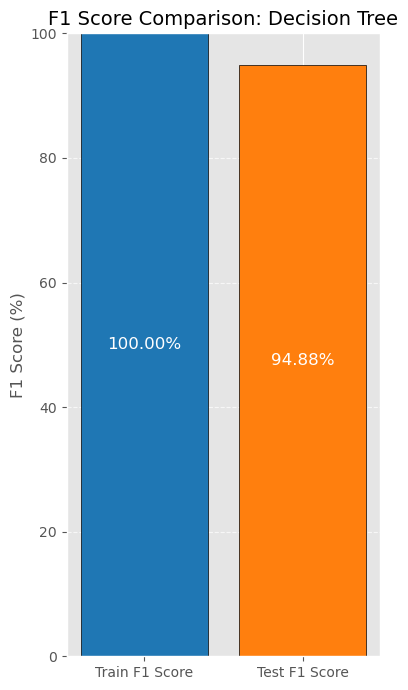

In [208]:
decision_tree_classifier = DecisionTreeClassifier()
call_model(decision_tree_classifier, 'Decision Tree')

### KNN Classification Algorithm

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     39158
           1       0.97      0.97      0.97     25414
           2       0.96      0.95      0.96     24562

    accuracy                           0.97     89134
   macro avg       0.97      0.97      0.97     89134
weighted avg       0.97      0.97      0.97     89134


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     79873
           1       0.98      0.98      0.98     51791
           2       0.98      0.97      0.98     49304

    accuracy                           0.98    180968
   macro avg       0.98      0.98      0.98    180968
weighted avg       0.98      0.98      0.98    180968

Training Accuracy: 98.41353167410813, Train Recall: 98.41353167410813, Train F1: 98.4120461317433
Test Accuracy: 97.15708932618305, Test Recall: 97.15708932618305

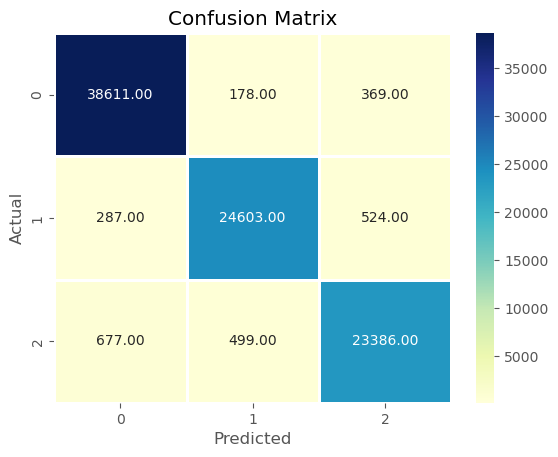

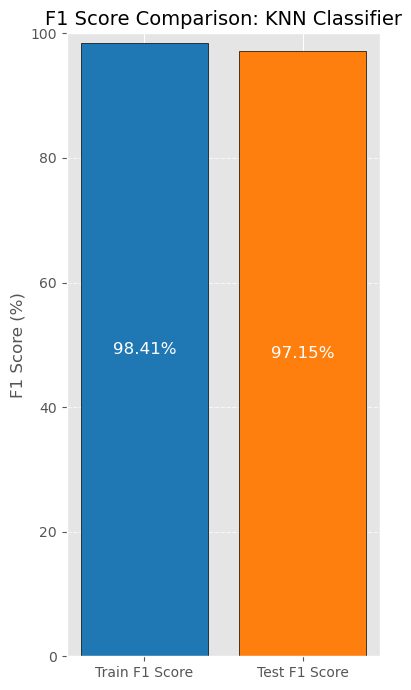

In [213]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
call_model(knn, 'KNN Classifier')

After evaluating of these classification algorithms, the logistic regression seem to be the best fit for the data due to its ability to handle  classification effectively, interpretability, and performance on the given datase with:

Training Accuracy: 99.95524070553911, Train Recall: 99.95524070553911, Train F1: 99.95523866024189
Test Accuracy: 99.96409899701572, Test Recall: 99.96409899701572, Test F1: 99.96409791995912

## Another Algorithm that can be used to Recommend Recipes is K-Nearest Neighbor. For item-based filtering, KNN finds items that are similar to what a user has interacted with and recommends them.

In [214]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [217]:
item_features=recipe_df_clean[features_cols]

### Fitting the Model

In [223]:
knn = NearestNeighbors(n_neighbors=10, metric='cosine')

In [224]:
knn.fit(item_features)

NearestNeighbors(metric='cosine', n_neighbors=10)

### Let's pick an item to Test

In [218]:
recipe_df_clean.iloc[3:4,]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,review_count_category,cluster
8,46,A Jad - Cucumber Pickle,1533,Dancer,NaN,PT25M,PT25M,1999-08-11T19:48:00Z,Make and share this A Jad - Cucumber Pickle re...,character(0),...,0.0,0.7,1.1,0.2,0.2,0.1,6.0,"c(""Slice the cucumber in four lengthwise, then...",Low Review Count,0


In [221]:
test_input=item_features.iloc[3:4,].to_numpy()


In [128]:
test_input

array([[-1.58590138, -1.0877462 , -0.90397208, -0.70046946, -0.95732717,
        -1.31108988, -1.0099313 , -0.96210227, -1.32197383, -0.06280047]])

In [ ]:
neighbors = knn.kneighbors(test_input)
neighbors

In [225]:
# Find nearest neighbors
distances, indices = knn.kneighbors(test_input)

In [226]:
for i in indices.flatten():
        print(recipe_df_clean1.index[i + 1])  # Adjust index for user ID

9
305259
150755
126217
375862
284450
161526
259404
256426
400808


In [227]:
indices.flatten()

array([     3, 157435,  76139,  63874, 194447, 146201,  81812, 133067,
       131521, 207305], dtype=int64)

In [229]:
recipe_df_clean.iloc[indices.flatten()]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions,review_count_category,cluster
8,46,A Jad - Cucumber Pickle,1533,Dancer,NaN,PT25M,PT25M,1999-08-11T19:48:00Z,Make and share this A Jad - Cucumber Pickle re...,character(0),...,0.0,0.7,1.1,0.2,0.2,0.1,6.0,"c(""Slice the cucumber in four lengthwise, then...",Low Review Count,0
305257,317049,"Roasted Chicken Breasts With Garlic, Rosemary,...",38040,Sondra Beth,PT45M,PT10M,PT55M,2008-08-01T00:49:00Z,This recipe stems from &quot;Roasted Chicken B...,character(0),...,0.0,0.4,0.6,0.1,0.0,0.1,4.0,"""Follow recipe ""Roasted Chicken Breasts Base R...",Low Review Count,0
150754,158005,Easy Garlic Skin Separator,6357,Charishma_Ramchanda,PT10M,PT10M,PT20M,2006-02-28T12:02:00Z,Skinning garlic has become so easy now. All th...,character(0),...,0.0,0.5,1.0,0.1,0.0,0.2,6.0,"c(""In a pan, roast the garlic pods in oil till...",Low Review Count,0
126216,132648,Weak and Split Nails Treatment,6357,Charishma_Ramchanda,PT24H,PT20M,PT24H20M,2005-08-08T21:56:00Z,This is from the Beauty column of the Weekend ...,character(0),...,0.0,0.5,1.0,0.1,0.0,0.2,6.0,"c(""Cut open the garlic clove so that you can r...",Low Review Count,0
375861,389443,"Rehydrated Onions, Mcdonald's Style",262272,cookee monster,NaN,PT20M,PT20M,2009-09-08T18:25:00Z,I worked at McDonald's many years ago. This i...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.0,0.5,1.0,0.1,0.5,0.1,6.0,"""Put onion and water in a small microwave proo...",Low Review Count,0
284447,295607,Lighter Breakfast Casserole,232886,Chef MB,PT30M,PT10M,PT40M,2008-03-31T22:56:00Z,Another one that came from WW. Sounds pretty g...,character(0),...,0.0,0.5,0.9,0.1,0.4,0.2,6.0,"c(""Spray saute pan with Pam and brown Boca cru...",Low Review Count,0
161524,169161,Ras El Hanout,83093,SusieQusie,NaN,PT10M,PT10M,2006-05-22T22:04:00Z,From Cooking Light May 2006. The name loosely...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.0,1.1,1.5,0.7,0.1,0.2,10.0,"""Combine all ingredients; store in an airtight...",Low Review Count,0
259398,269830,Turkey Dripping Gravy,328154,Jfoxe,PT15M,PT5M,PT20M,2007-12-04T01:58:00Z,Make and share this Turkey Dripping Gravy reci...,character(0),...,0.0,0.4,1.0,0.2,0.1,0.1,6.0,"c(""Pour turkey drippings from Roasted Butter H...",Low Review Count,0
256424,266763,Italian Seasoning,618565,winniwoo19,NaN,PT10M,PT10M,2007-11-19T22:23:00Z,Make and share this Italian Seasoning recipe f...,character(0),...,0.0,0.8,1.1,0.6,0.1,0.2,8.0,"""Mix all together and store in container.""",Low Review Count,0
400806,415490,Meyer Lemon Granita,579298,Peachie Keene,PT5M,PT3H,PT3H5M,2010-03-04T16:50:00Z,Peggy Knickerbocker is a San Francisco-based c...,character(0),...,0.0,0.4,1.3,0.4,0.3,0.1,6.0,"c(""Place the zest, water, mint springs, and ag...",Low Review Count,0
